In [2]:
import opendatasets as od
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns 
from sklearn.metrics import mean_squared_error

In [20]:
pd.options.display.float_format = '{:.5f}'.format

In [8]:
dataset_url = "https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview"

In [10]:
od.download(dataset_url)

100%|██████████| 1.56G/1.56G [04:34<00:00, 6.10MB/s]



Extracting archive .\new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to .\new-york-city-taxi-fare-prediction


In [2]:
data_dir = "new-york-city-taxi-fare-prediction"

In [3]:
df = pd.read_csv("new-york-city-taxi-fare-prediction/train.csv")
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
55423851,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
55423852,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
55423853,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
55423854,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1


In [4]:
col_name = list(df.columns)
col_name

['key',
 'fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [5]:
n = len(df)
s = round(n * 0.1)

skip = sorted(random.sample(range(1, n+1), n-s))

In [6]:
df = pd.read_csv("new-york-city-taxi-fare-prediction/train.csv", skiprows=skip)
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-04-05 17:11:05.0000001,7.70,2011-04-05 17:11:05 UTC,-74.001821,40.737547,-73.998060,40.722788,2
1,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00 UTC,0.000000,0.000000,0.000000,0.000000,1
2,2011-03-29 15:39:49.0000002,8.10,2011-03-29 15:39:49 UTC,-73.984267,40.744961,-73.981646,40.759608,1
3,2010-05-14 08:09:00.000000210,6.90,2010-05-14 08:09:00 UTC,-73.955118,40.768942,-73.963495,40.761887,2
4,2011-08-31 08:21:47.0000004,12.50,2011-08-31 08:21:47 UTC,-73.917399,40.746485,-73.973756,40.763836,1
...,...,...,...,...,...,...,...,...
5542381,2014-07-31 09:06:06.0000004,30.33,2014-07-31 09:06:06 UTC,-73.961712,40.756475,-73.885310,40.772831,2
5542382,2015-04-30 19:25:05.0000006,6.50,2015-04-30 19:25:05 UTC,-74.005333,40.728714,-73.999130,40.715801,1
5542383,2014-03-04 22:25:01.0000002,12.00,2014-03-04 22:25:01 UTC,-73.983015,40.745082,-73.954176,40.767337,1
5542384,2014-03-15 03:28:00.00000070,14.00,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1


In [7]:
df = df.drop(["key"], axis=1)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.70,2011-04-05 17:11:05 UTC,-74.001821,40.737547,-73.998060,40.722788,2
1,6.50,2011-02-07 20:01:00 UTC,0.000000,0.000000,0.000000,0.000000,1
2,8.10,2011-03-29 15:39:49 UTC,-73.984267,40.744961,-73.981646,40.759608,1
3,6.90,2010-05-14 08:09:00 UTC,-73.955118,40.768942,-73.963495,40.761887,2
4,12.50,2011-08-31 08:21:47 UTC,-73.917399,40.746485,-73.973756,40.763836,1
...,...,...,...,...,...,...,...
5542381,30.33,2014-07-31 09:06:06 UTC,-73.961712,40.756475,-73.885310,40.772831,2
5542382,6.50,2015-04-30 19:25:05 UTC,-74.005333,40.728714,-73.999130,40.715801,1
5542383,12.00,2014-03-04 22:25:01 UTC,-73.983015,40.745082,-73.954176,40.767337,1
5542384,14.00,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1


In [44]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
count,5542374.00000,5542374.00000,5542374.00000,5542344.00000,5542344.00000,5542374.00000,5542344.00000
mean,11.35518,-72.50980,39.92138,-72.50741,39.92053,1.68532,20.03611
std,27.92588,12.98070,9.72495,12.79913,10.09118,1.30891,373.33345
min,-105.00000,-3426.60895,-3488.03118,-3408.43050,-3430.76631,0.00000,0.00000
25%,6.00000,-73.99206,40.73491,-73.99141,40.73403,1.00000,1.21245
50%,8.50000,-73.98180,40.75264,-73.98015,40.75316,1.00000,2.11635
75%,12.50000,-73.96709,40.76712,-73.96367,40.76810,2.00000,3.87689
max,61550.86000,3239.51314,3361.26630,3382.12569,3407.39148,9.00000,18901.55554


In [41]:
lat_values = []
for i in range(-90,91):
    lat_values.append(i)

lon_values = []
for j in range(-180, 181):
    lon_values.append(j)

the range of latitude is -90 to +90 
the range of longitude is -180 to +180
Hence, any value greater than mentioned value must be dropped 

In [61]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [64]:
df = remove_outliers(df)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
0,7.70000,2011-04-05 17:11:05+00:00,-74.00182,40.73755,-73.99806,40.72279,2,1.67144
2,8.10000,2011-03-29 15:39:49+00:00,-73.98427,40.74496,-73.98165,40.75961,1,1.64357
3,6.90000,2010-05-14 08:09:00+00:00,-73.95512,40.76894,-73.96349,40.76189,2,1.05505
4,12.50000,2011-08-31 08:21:47+00:00,-73.91740,40.74648,-73.97376,40.76384,1,5.12410
5,7.50000,2014-05-19 06:26:00+00:00,-73.99081,40.73049,-73.97834,40.75109,1,2.51932
...,...,...,...,...,...,...,...,...
5542381,30.33000,2014-07-31 09:06:06+00:00,-73.96171,40.75648,-73.88531,40.77283,2,6.68658
5542382,6.50000,2015-04-30 19:25:05+00:00,-74.00533,40.72871,-73.99913,40.71580,1,1.52802
5542383,12.00000,2014-03-04 22:25:01+00:00,-73.98301,40.74508,-73.95418,40.76734,1,3.46762
5542384,14.00000,2014-03-15 03:28:00+00:00,-74.00527,40.74003,-73.96328,40.76255,1,4.33440


In [65]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
count,5406236.00000,5406236.00000,5406236.00000,5406236.00000,5406236.00000,5406236.00000,5406236.00000
mean,11.33375,-73.97514,40.75104,-73.97430,40.75140,1.69137,3.33100
std,9.70102,0.03922,0.03008,0.03841,0.03326,1.30717,3.78580
min,1.00000,-74.99456,40.00000,-74.99339,40.00561,1.00000,0.00000
25%,6.00000,-73.99227,40.73654,-73.99160,40.73557,1.00000,1.25367
50%,8.50000,-73.98209,40.75336,-73.98061,40.75386,1.00000,2.15328
75%,12.50000,-73.96831,40.76755,-73.96534,40.76840,2.00000,3.91306
max,500.00000,-72.05000,41.98460,-72.05459,41.98403,6.00000,163.14252


<AxesSubplot:ylabel='fare_amount'>

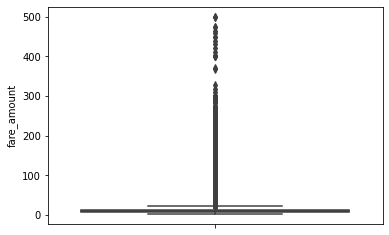

In [66]:
sns.boxplot(data = df, y = "fare_amount")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5406236 entries, 0 to 5542385
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   fare_amount        float64            
 1   pickup_datetime    datetime64[ns, UTC]
 2   pickup_longitude   float64            
 3   pickup_latitude    float64            
 4   dropoff_longitude  float64            
 5   dropoff_latitude   float64            
 6   passenger_count    int64              
 7   trip_distance      float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 371.2 MB


In [9]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.70,2011-04-05 17:11:05+00:00,-74.001821,40.737547,-73.998060,40.722788,2
1,6.50,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1
2,8.10,2011-03-29 15:39:49+00:00,-73.984267,40.744961,-73.981646,40.759608,1
3,6.90,2010-05-14 08:09:00+00:00,-73.955118,40.768942,-73.963495,40.761887,2
4,12.50,2011-08-31 08:21:47+00:00,-73.917399,40.746485,-73.973756,40.763836,1
...,...,...,...,...,...,...,...
5542381,30.33,2014-07-31 09:06:06+00:00,-73.961712,40.756475,-73.885310,40.772831,2
5542382,6.50,2015-04-30 19:25:05+00:00,-74.005333,40.728714,-73.999130,40.715801,1
5542383,12.00,2014-03-04 22:25:01+00:00,-73.983015,40.745082,-73.954176,40.767337,1
5542384,14.00,2014-03-15 03:28:00+00:00,-74.005272,40.740027,-73.963280,40.762555,1


In [68]:
df_index = df.set_index("pickup_datetime")
df_index

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
pickup_datetime,,,,,,,
2011-04-05 17:11:05+00:00,7.70000,-74.00182,40.73755,-73.99806,40.72279,2,1.67144
2011-03-29 15:39:49+00:00,8.10000,-73.98427,40.74496,-73.98165,40.75961,1,1.64357
2010-05-14 08:09:00+00:00,6.90000,-73.95512,40.76894,-73.96349,40.76189,2,1.05505
2011-08-31 08:21:47+00:00,12.50000,-73.91740,40.74648,-73.97376,40.76384,1,5.12410
2014-05-19 06:26:00+00:00,7.50000,-73.99081,40.73049,-73.97834,40.75109,1,2.51932
...,...,...,...,...,...,...,...
2014-07-31 09:06:06+00:00,30.33000,-73.96171,40.75648,-73.88531,40.77283,2,6.68658
2015-04-30 19:25:05+00:00,6.50000,-74.00533,40.72871,-73.99913,40.71580,1,1.52802
2014-03-04 22:25:01+00:00,12.00000,-73.98301,40.74508,-73.95418,40.76734,1,3.46762


Using Haversine formula 

* a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
* c = 2 ⋅ atan2( √a, √(1−a) )
* d = R ⋅ c

math module expects a single number, using numpy for providing series as input 

In [69]:
# Haversine Formula 
from math import radians, cos, sin, asin, sqrt

def haversine_dist(lon1, lat1, lon2, lat2):

    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    lon1 = np.radians(lon1)
    lon2 = np.radians(lon2)

    # Haversine formula 
    dlat = lat2 - lat1
    dlon = lon2 - lon1 
    a = np.sin(dlat / 2.0)** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2

    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371 # radius of earth in km

    distance = c * r

    return distance

In [70]:
def add_distance(df):
    df["trip_distance"] = haversine_dist(df["pickup_longitude"], df["pickup_latitude"], 
    df["dropoff_longitude"], df["dropoff_latitude"])

In [71]:
add_distance(df)
df

C:\Users\saqui\AppData\Local\Temp/ipykernel_23004/2373803200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["trip_distance"] = haversine_dist(df["pickup_longitude"], df["pickup_latitude"],


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
0,7.70000,2011-04-05 17:11:05+00:00,-74.00182,40.73755,-73.99806,40.72279,2,1.67144
2,8.10000,2011-03-29 15:39:49+00:00,-73.98427,40.74496,-73.98165,40.75961,1,1.64357
3,6.90000,2010-05-14 08:09:00+00:00,-73.95512,40.76894,-73.96349,40.76189,2,1.05505
4,12.50000,2011-08-31 08:21:47+00:00,-73.91740,40.74648,-73.97376,40.76384,1,5.12410
5,7.50000,2014-05-19 06:26:00+00:00,-73.99081,40.73049,-73.97834,40.75109,1,2.51932
...,...,...,...,...,...,...,...,...
5542381,30.33000,2014-07-31 09:06:06+00:00,-73.96171,40.75648,-73.88531,40.77283,2,6.68658
5542382,6.50000,2015-04-30 19:25:05+00:00,-74.00533,40.72871,-73.99913,40.71580,1,1.52802
5542383,12.00000,2014-03-04 22:25:01+00:00,-73.98301,40.74508,-73.95418,40.76734,1,3.46762
5542384,14.00000,2014-03-15 03:28:00+00:00,-74.00527,40.74003,-73.96328,40.76255,1,4.33440


In [72]:
df["trip_distance"].max()

163.1425201852527

In [74]:
max_df = df[df["trip_distance"] == 163.1425201852527]
max_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
4628229,13.30000,2012-05-16 20:43:00+00:00,-72.05000,40.71428,-73.98532,40.76362,1,163.14252


<AxesSubplot:xlabel='pickup_datetime'>

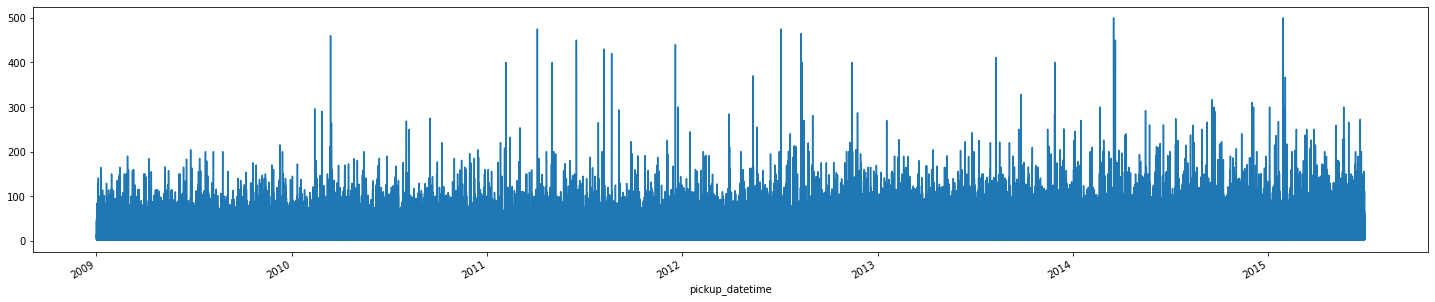

In [75]:
df_index["fare_amount"].plot(figsize = (25, 5))

In [102]:
test_df = pd.read_csv("new-york-city-taxi-fare-prediction/test.csv", parse_dates=["pickup_datetime"])
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.97332,40.76381,-73.98143,40.74384,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.98686,40.71938,-73.99889,40.73920,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.98252,40.75126,-73.97965,40.74614,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.98116,40.76781,-73.99045,40.75164,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.96605,40.78977,-73.98856,40.74443,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.96812,40.79700,-73.95564,40.78039,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.94551,40.80360,-73.96021,40.77637,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.99160,40.72661,-73.78974,40.64701,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.98557,40.73543,-73.93918,40.80173,6


In [103]:
test_df = test_df.drop(["key"], axis = 1)
test_df

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.97332,40.76381,-73.98143,40.74384,1
1,2015-01-27 13:08:24+00:00,-73.98686,40.71938,-73.99889,40.73920,1
2,2011-10-08 11:53:44+00:00,-73.98252,40.75126,-73.97965,40.74614,1
3,2012-12-01 21:12:12+00:00,-73.98116,40.76781,-73.99045,40.75164,1
4,2012-12-01 21:12:12+00:00,-73.96605,40.78977,-73.98856,40.74443,1
...,...,...,...,...,...,...
9909,2015-05-10 12:37:51+00:00,-73.96812,40.79700,-73.95564,40.78039,6
9910,2015-01-12 17:05:51+00:00,-73.94551,40.80360,-73.96021,40.77637,6
9911,2015-04-19 20:44:15+00:00,-73.99160,40.72661,-73.78974,40.64701,6
9912,2015-01-31 01:05:19+00:00,-73.98557,40.73543,-73.93918,40.80173,6


In [104]:
add_distance(test_df)
test_df

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
0,2015-01-27 13:08:24+00:00,-73.97332,40.76381,-73.98143,40.74384,1,2.32326
1,2015-01-27 13:08:24+00:00,-73.98686,40.71938,-73.99889,40.73920,1,2.42535
2,2011-10-08 11:53:44+00:00,-73.98252,40.75126,-73.97965,40.74614,1,0.61863
3,2012-12-01 21:12:12+00:00,-73.98116,40.76781,-73.99045,40.75164,1,1.96103
4,2012-12-01 21:12:12+00:00,-73.96605,40.78977,-73.98856,40.74443,1,5.38730
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51+00:00,-73.96812,40.79700,-73.95564,40.78039,6,2.12487
9910,2015-01-12 17:05:51+00:00,-73.94551,40.80360,-73.96021,40.77637,6,3.27097
9911,2015-04-19 20:44:15+00:00,-73.99160,40.72661,-73.78974,40.64701,6,19.18394
9912,2015-01-31 01:05:19+00:00,-73.98557,40.73543,-73.93918,40.80173,6,8.34349


In [37]:
test_df_ix = test_df.set_index("pickup_datetime")
test_df_ix

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
pickup_datetime,,,,,
2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...
2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6


In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 1   pickup_longitude   9914 non-null   float64            
 2   pickup_latitude    9914 non-null   float64            
 3   dropoff_longitude  9914 non-null   float64            
 4   dropoff_latitude   9914 non-null   float64            
 5   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [33]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:02:24+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:45+0000', tz='UTC'))

<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

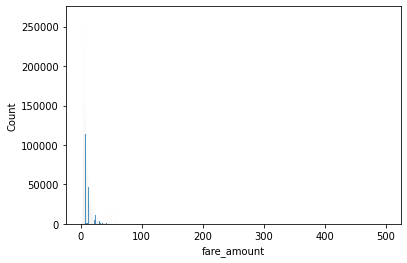

In [76]:
sns.histplot(data = df, x = "fare_amount")

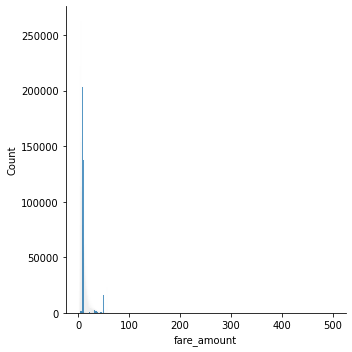

In [77]:
sns.displot(data = df, x = "fare_amount")

In [26]:
sns.set(rc={"figure.figsize":(10, 15)})

<AxesSubplot:ylabel='fare_amount'>

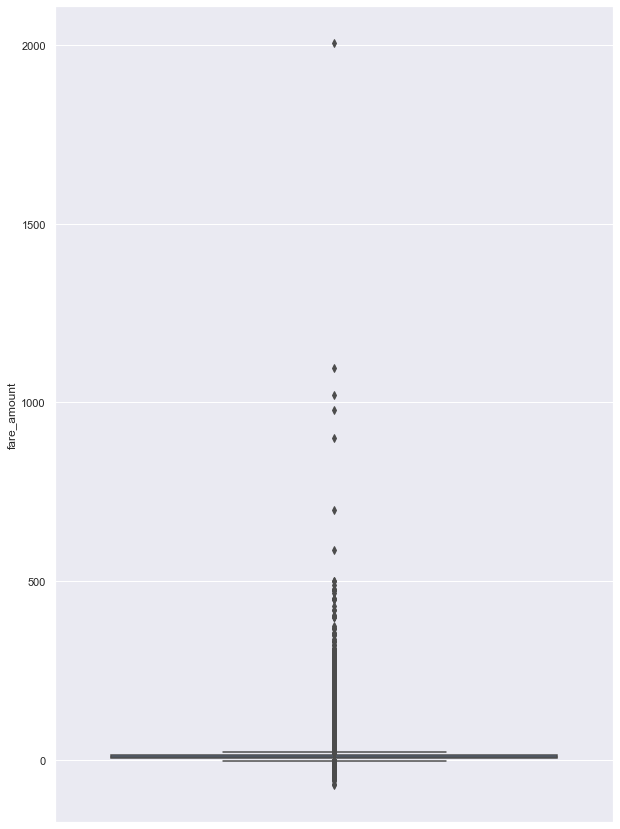

In [27]:
sns.boxplot(data = df, y = df["fare_amount"])

In [78]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=10)

In [79]:
len(train_df), len(val_df)

(4324988, 1081248)

In [82]:
train_df.isna().sum(), val_df.isna().sum()

(fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 trip_distance        0
 dtype: int64,
 fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 trip_distance        0
 dtype: int64)

In [81]:
train_df, val_df = train_df.dropna(), val_df.dropna()

In [83]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
3026156,42.33000,2014-06-02 11:49:16+00:00,-73.88603,40.77300,-73.96879,40.75041,1,7.40983
4059421,4.10000,2009-05-27 16:24:00+00:00,-73.95658,40.77915,-73.96378,40.77434,2,0.80825
2739528,10.10000,2009-07-15 16:14:28+00:00,-73.97565,40.76351,-73.94642,40.77193,1,2.63380
2277038,30.00000,2013-03-31 09:37:29+00:00,-73.95637,40.77567,-73.97357,40.68650,1,10.02095
5274426,5.50000,2012-10-23 23:43:00+00:00,-73.99042,40.72489,-73.98191,40.73109,1,0.99504
...,...,...,...,...,...,...,...,...
2025943,7.50000,2012-09-17 20:54:00+00:00,-74.00222,40.73468,-74.01287,40.71802,1,2.05874
3333122,11.00000,2013-02-13 09:27:00+00:00,-73.96111,40.76076,-73.98147,40.75391,2,1.87558
3679739,16.50000,2013-10-05 11:06:26+00:00,-73.94787,40.83029,-73.97455,40.78716,1,5.29477
1978198,11.00000,2013-02-11 15:11:52+00:00,-73.98167,40.76482,-74.00731,40.74849,1,2.82131


<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

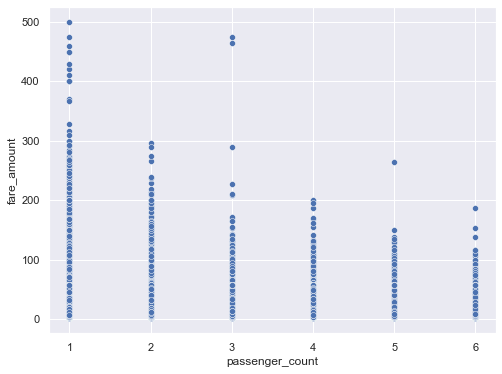

In [84]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.scatterplot(y = train_df["fare_amount"], x = train_df["passenger_count"])

In [76]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [85]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
trip_distance        0
dtype: int64

In [87]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
3026156,42.33000,2014-06-02 11:49:16+00:00,-73.88603,40.77300,-73.96879,40.75041,1,7.40983
4059421,4.10000,2009-05-27 16:24:00+00:00,-73.95658,40.77915,-73.96378,40.77434,2,0.80825
2739528,10.10000,2009-07-15 16:14:28+00:00,-73.97565,40.76351,-73.94642,40.77193,1,2.63380
2277038,30.00000,2013-03-31 09:37:29+00:00,-73.95637,40.77567,-73.97357,40.68650,1,10.02095
5274426,5.50000,2012-10-23 23:43:00+00:00,-73.99042,40.72489,-73.98191,40.73109,1,0.99504
...,...,...,...,...,...,...,...,...
2025943,7.50000,2012-09-17 20:54:00+00:00,-74.00222,40.73468,-74.01287,40.71802,1,2.05874
3333122,11.00000,2013-02-13 09:27:00+00:00,-73.96111,40.76076,-73.98147,40.75391,2,1.87558
3679739,16.50000,2013-10-05 11:06:26+00:00,-73.94787,40.83029,-73.97455,40.78716,1,5.29477
1978198,11.00000,2013-02-11 15:11:52+00:00,-73.98167,40.76482,-74.00731,40.74849,1,2.82131


In [88]:
x = train_df.iloc[:, 6:]
x

,passenger_count,trip_distance
3026156,1,7.40983
4059421,2,0.80825
2739528,1,2.63380
2277038,1,10.02095
5274426,1,0.99504
...,...,...
2025943,1,2.05874
3333122,2,1.87558
3679739,1,5.29477
1978198,1,2.82131


In [89]:
x_col = list(x.columns)
y_col = "fare_amount"

In [90]:
x_train = train_df[x_col]
x_train

,passenger_count,trip_distance
3026156,1,7.40983
4059421,2,0.80825
2739528,1,2.63380
2277038,1,10.02095
5274426,1,0.99504
...,...,...
2025943,1,2.05874
3333122,2,1.87558
3679739,1,5.29477
1978198,1,2.82131


In [91]:
y_train = train_df[y_col]
y_train

3026156   42.33000
4059421    4.10000
2739528   10.10000
2277038   30.00000
5274426    5.50000
            ...   
2025943    7.50000
3333122   11.00000
3679739   16.50000
1978198   11.00000
5374844    6.50000
Name: fare_amount, Length: 4324988, dtype: float64

### Validation Data

In [92]:
x_val = val_df[x_col]
x_val

,passenger_count,trip_distance
4348796,2,0.00000
3043228,1,1.24936
2813235,1,1.01185
1333655,1,3.17985
1488410,2,1.70274
...,...,...
2874402,1,1.56800
3951324,6,7.90477
2502338,1,9.91642
2700509,1,0.86152


In [93]:
y_val = val_df[y_col]
y_val

4348796    5.70000
3043228    6.50000
2813235    4.90000
1333655    6.90000
1488410    6.50000
            ...   
2874402    7.00000
3951324   20.50000
2502338   31.87000
2700509    4.10000
2536022    7.00000
Name: fare_amount, Length: 1081248, dtype: float64

Test Data

In [106]:
x_test = test_df[x_col]
x_test

,passenger_count,trip_distance
0,1,2.32326
1,1,2.42535
2,1,0.61863
3,1,1.96103
4,1,5.38730
...,...,...
9909,6,2.12487
9910,6,3.27097
9911,6,19.18394
9912,6,8.34349


In [107]:
x_train[x_col] = x_train[x_col].astype(float)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324988 entries, 3026156 to 5374844
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  float64
 1   trip_distance    float64
dtypes: float64(2)
memory usage: 99.0 MB


C:\Users\saqui\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Modelling 

Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [110]:
y_lr_train = model_lr.predict(x_train)
y_lr_train

array([15.4157468 ,  8.80176819, 10.57855554, ..., 13.27360155,
       10.76846332,  8.76275188])

In [113]:
y_lr_val = model_lr.predict(x_val)
y_lr_val

array([ 7.98317124,  9.17638901,  8.93583463, ..., 17.95443246,
        8.78357628,  9.73552613])

In [114]:
train_rmse = mean_squared_error(y_val, y_lr_val, squared=False)
train_rmse

6.905955802281572

In [116]:
y_val.describe()

count   1081248.00000
mean         11.32686
std           9.67161
min           1.11000
25%           6.00000
50%           8.50000
75%          12.50000
max         500.00000
Name: fare_amount, dtype: float64

Feature Engineering

In [117]:
def date_time_extract(df, col):
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day
    df[col + "_weekday"] = df[col].dt.weekday
    df[col + "_time"] = df[col].dt.time 

    return date_time_extract

In [118]:
date_time_extract(train_df, "pickup_datetime")
date_time_extract(val_df, "pickup_datetime")
date_time_extract(test_df, "pickup_datetime")

<function __main__.date_time_extract(df, col)>

In [119]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_time
3026156,42.33000,2014-06-02 11:49:16+00:00,-73.88603,40.77300,-73.96879,40.75041,1,7.40983,2014,6,2,0,11:49:16
4059421,4.10000,2009-05-27 16:24:00+00:00,-73.95658,40.77915,-73.96378,40.77434,2,0.80825,2009,5,27,2,16:24:00
2739528,10.10000,2009-07-15 16:14:28+00:00,-73.97565,40.76351,-73.94642,40.77193,1,2.63380,2009,7,15,2,16:14:28
2277038,30.00000,2013-03-31 09:37:29+00:00,-73.95637,40.77567,-73.97357,40.68650,1,10.02095,2013,3,31,6,09:37:29
5274426,5.50000,2012-10-23 23:43:00+00:00,-73.99042,40.72489,-73.98191,40.73109,1,0.99504,2012,10,23,1,23:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025943,7.50000,2012-09-17 20:54:00+00:00,-74.00222,40.73468,-74.01287,40.71802,1,2.05874,2012,9,17,0,20:54:00
3333122,11.00000,2013-02-13 09:27:00+00:00,-73.96111,40.76076,-73.98147,40.75391,2,1.87558,2013,2,13,2,09:27:00
3679739,16.50000,2013-10-05 11:06:26+00:00,-73.94787,40.83029,-73.97455,40.78716,1,5.29477,2013,10,5,5,11:06:26
1978198,11.00000,2013-02-11 15:11:52+00:00,-73.98167,40.76482,-74.00731,40.74849,1,2.82131,2013,2,11,0,15:11:52


In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324988 entries, 3026156 to 5374844
Data columns (total 13 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   fare_amount              float64            
 1   pickup_datetime          datetime64[ns, UTC]
 2   pickup_longitude         float64            
 3   pickup_latitude          float64            
 4   dropoff_longitude        float64            
 5   dropoff_latitude         float64            
 6   passenger_count          int64              
 7   trip_distance            float64            
 8   pickup_datetime_year     int64              
 9   pickup_datetime_month    int64              
 10  pickup_datetime_day      int64              
 11  pickup_datetime_weekday  int64              
 12  pickup_datetime_time     object             
dtypes: datetime64[ns, UTC](1), float64(6), int64(5), object(1)
memory usage: 462.0+ MB


<AxesSubplot:xlabel='pickup_datetime_month', ylabel='count'>

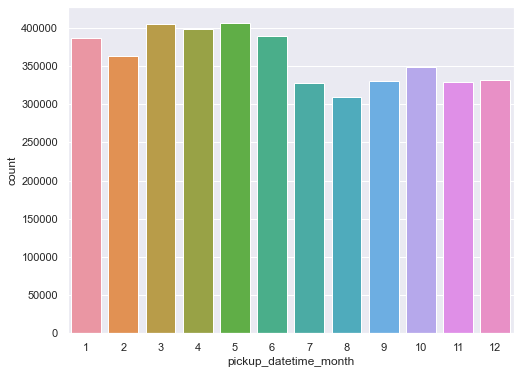

In [143]:
sns.countplot(data = train_df, x = "pickup_datetime_month")

<AxesSubplot:xlabel='pickup_datetime_month', ylabel='fare_amount'>

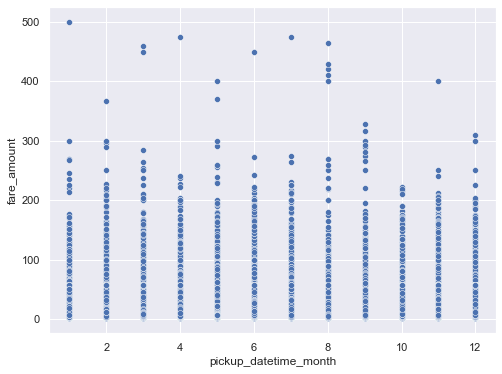

In [144]:
sns.scatterplot(data = train_df, x = "pickup_datetime_month", y = "fare_amount")

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

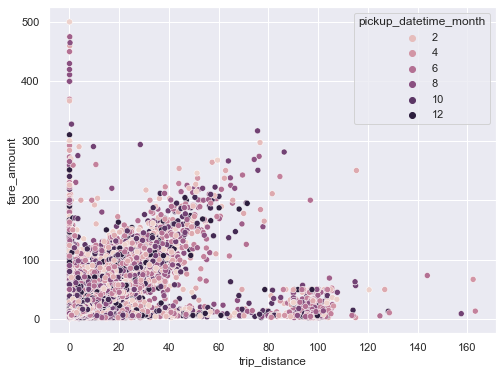

In [156]:
sns.scatterplot(data = train_df, x = "trip_distance", y = "fare_amount", hue = "pickup_datetime_month")

In [154]:
print(f"The standard deviation for month is {np.std(train_df['trip_distance'])}")
print(f"The mean for month is {np.mean(train_df['trip_distance'])}")

The standard deviation for month is 3.790540985949612
The mean for month is 3.331883306860244


In [134]:
train_df["pickup_datetime_month"].value_counts()

5     406730
3     404526
4     398962
6     389551
1     385994
2     363482
10    349044
12    331965
9     329666
11    328584
7     327465
8     309019
Name: pickup_datetime_month, dtype: int64